TLDR (Executive summary);
<br>
<b>Aineistolle esitettävä kysymys</b>: Ketkä työntekijät kuuluvat siihen joukkoon, jotka todennäköisesti ovat päättämässä työsopimuksensa?
<br>
<br>
Tässä halutaan nimenomaan minimoida oikean yläkulman luku (maksimoimalla vasen yläkulma onnistutaan ennustamaan toistaiseksi jatkuvat työsuhteet) ja maksimoida oikean alakulman luku (minimoimalla vasen alakulma onnistutaan ennustamaan päätökseen tulevat työsuhteet)
<br>
<br>
<b>Logistinen regressio</b>:
<br>
Testidatalle confusion_matrix
<br>
[[301   7]
<br>
 [ 29  31]]
<br>
ja accuracy_score 0.9021739130434783
<br>
<br>
<b>KNN=9</b>
<br>
Testidatalle confusion_matrix
<br>
[[304   4]
<br>
[ 55   5]]
<br>
ja accuracy_score 0.8396739130434783
<br>
<br>
<b>Päätöspuun syvyys = 3</b>
<br>
Testidatalle confusion_matrix
<br>
[[302   6]
<br>
 [ 47  13]]
<br>
ja accuracy_score 0.8559782608695652
<br>
<br>
<b>Gaussian Naive Bayes</b>
<br>
Testidatalle confusion_matrix
<br>
[[255  53]
<br>
 [ 23  37]]
<br>
ja accuracy_score 0.7934782608695652
<br>
<br>
Toimenpide-ehdotus: Logistinen regressio saattaisi olla hyvä lähtökohta mallien soveltamiseen käytännössä, jotta päästään liikkeelle ja saadaan baseline, jota vasten voidaan jatkossa vertailla

Perusprosessissa Data Wrangling 
<br>
https://en.wikipedia.org/wiki/Data_wrangling
<br>
eli datan valmistelu (ETL putsaus jne) vie yleensä 80% työajasta. Datan valmistelu koneoppimisen malleja varten:
<br>
https://nbviewer.jupyter.org/github/taanila/tilastoapu/blob/master/datan_valmistelu.ipynb
<br>
Luokittele sen jälkeen pystyrivit (sarakkeet) joko kategorisiin tai määrällisiin. Ja esitä analytiikan osa-alueen (perinteisen neliportaisen tason) mukaisia, siis ihmismielelle mielekkäitä, kysymyksiä aineistolle:


#### Ennakoiva analytiikka: Koneoppiminen
https://tilastoapu.wordpress.com/2019/08/03/koneoppiminen-ja-scikit-learn-kirjasto/
#### Lähestyminen valitaan sen mukaan<br>1. onko jo etukäteen saatavilla ennustettavan muuttujan todellisia arvoja (label) vahvistettuina tietoina (training set eli opetusdata, supervised learning)<br>2. vai ei (unsupervised learning) ja kolmantena mahdollisuutena on<br>3. algoritmin palkitseminen tai rankaiseminen (reinforcement learning) sen suorittaessa analytiikkaa

Koneoppiminen opetusdatasta (supervised learning):
<br>
Lähestyminen valitaan sen mukaan onko ennustettavan muuttujan (target) arvot kategorisia (discrete label) vai määrällisiä (continuous label):
<br>
Kategoriselle muuttujalle luokittelumalli
<br>
Määrälliselle muuttujalle regressio-malli
<br>
Feature matrix tarkoittaa muuttujia, jotka selittävät ennustettavaa muuttujaa (target)
<br>
<font color="grey">Koneoppiminen ilman opetusdataa (unsupervised learning):
<br>
Klusterointi-malli (pyritään löytämään yhteen kuuluvat havainnot, esim. K-means)
<br>
Yksinkertaistamisen malli (core: pienin mahdollinen määrä muuttujia joka selittää riittävästi asiaa, esim. pääkomponenttianalyysi)
<br>
<i>Syvä oppiminen (deep learning) pohjautuu neuroverkkomenetelmiin, joilla pyritään myös jäljittelemään ihmisaivojenkin toimintaa</i>
</font>

SUPERVISED LEARNING (<b><font color="red">eri malleja pitää vaan työläästi kokeilla</font></b>)
<br>
<b>Luokittelumalleja kategoriselle target muuttujalle</b>:
<br>
K lähintä naapuria (K nearest neighbor), Päätöspuut (decision trees), Gaussian Naiivi Bayes, Logistinen regressio.
<br>
käyttötarkoituksena esim:
<br>
OCR (Optical Character Recognition) eli kuvapikseleistä esim. auton rekisterinumeron muuttaminen tekstiksi, kuvapikseleistä esineen tunnistaminen, röntgenkuvasta sairauden tunnistaminen, maksuhäiriöön ajautumisen todennäköisyys, vakuutuspetos, roskapostin suodatus jne
<br>
HUOM! Mikäli kategorista targettia selittävään feature matrixiin otetaan mukaan kategorisia muuttujia, tulee ne kategoriset feature matrixin selittävät muuttujat muuttaa dikotomisiksi dummy muuttujiksi eli nolliksi ja ykkösiksi pandas kirjaston 'get_dummies()' komennolla
<br>
df_dummies = pd.get_dummies(df)
<br>
HUOM! Yllä oleva komento muuttaa data framen kaikki tekstimuotoiset kategoriset muuttujat dummyiksi, mutta jos kategorinen muuttuja on muuta muotoa, niin silloin tulee antaa lisäparametreilla pandakselle tieto mitkä sarakkeet muutetaan 
<br>
<br>
<b>Useimmiten regressiomalli on target määrälliselle muuttujalle tarkoituksenmukaisin</b> (selittävä feature matrix on määrällinen muuttuja, koska korrelaatio):
<br>
lineaarinen regressio (etsitään suora viiva joka parhaiten kulkee havaintojen kautta)
<br>
käyttötarkoituksena esim:
<br>
kysynnän ennustaminen, asunnon hinta (onko saunaa, parveketta tms), käytetyn auton hinta jne


LUOKITTELU

In [1]:
#Tuodaan käytettäväksi data-analytiikan kirjasto pandas ja
#lyhennetään sitä kutsuttavaksi aliaksella pd
## https://pandas.pydata.org/docs/user_guide/dsintro.html#dataframe
import pandas as pd

#Tuodaan graafiseen esittämiseen matplotlib ja sen käyttöliittymäksi pyplot
## https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html?highlight=pyplot#module-matplotlib.pyplot
import matplotlib.pyplot as plt

#Vaaditaan vanhoissa Juptter Notebook versioissa, jotta kaaviot tulostuvat
%matplotlib inline

#Katsotaan millaisia erilaisia muotoilutyylejä on saatavilla
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [2]:
#Valitaan graafinen esittäminen muotoiltavaksi tietyllä tyylillä
plt.style.use('seaborn-whitegrid')

#Asetetaan näytettävien rivien rajoite (ei rajoitetta)
pd.options.display.max_rows = None
#Asetetaan näytettävien sarakkeiden rajoite (ei rajoitetta)
pd.options.display.max_columns = None

# CSV https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
#TARKISTA TARVITAANKO
##sepstr, default ‘,’
##usecolslist-like or callable, optional
df = pd.read_csv('https://taanila.fi/employee.csv')
##Jatkossa Data Frame (df) tulkitaan oletuksena pd:n kirjaston käyttäjäksi
#Tarkistetaan lähdetiedoston metatiedoista monessako sarakkeessa on minkäkin verran arvoja ja mitä tyyppiä ne sisältää 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Yhden rekrytoinnin hinta on rekrytointiprosessin osalta noin 10.000 euroa. Koeajan perehdytys on vielä sitäkin kalliimpaa.. Syynä se, että perehdytys sitoo tuottavan ja kallispalkkaisen osaajan perehdytyksen ajan isolta osin pois välittömien tuotannontekijöiden joukosta.

-->

Mitä pidempään toimijan palkkalistoilla ollut henkilö poistuu resurssipoolista, sitä suurempi sanattoman tiedon aivokapasiteetin vuoto kilpailijalle siirtyminen on.


<b>Aineistolle esitettävä kysymys</b>: Ketkä työntekijät kuuluvat siihen joukkoon, jotka todennäköisesti ovat päättämässä työsopimuksensa?

Attrition muuttuja (target) kertoo historiallisesti onko työntekijän työsuhde päättynyt (discrete label). Tarkoituksena on luoda koneoppimisen supervised learning malli historiadatasta, joka ennakoi nykytilanteessa mahdollisesti / todennäköisesti toimijan palkkalistoilta poistumassa olevia inhimillisiä voimavaroja 

In [3]:
#Kurkataan 5 vikaa riviä niinkuin Linuxissa ja nähdään sitenkin rivien määrä
df.tail()
##tai 5 ekaa riviä
##df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


In [4]:
#Mahdollisten tyhjien arvojen tarkistus
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
#Muutetaan tekstimuotoisten kategoristen muuttujien sarakkeiden arvot
#dikotomisiksi dummy muuttujiksi eli nolliksi ja ykkösiksi 
df_dummies = pd.get_dummies(df)
##Jos kategorinen muuttuja on muuta muotoa, niin silloin tulee antaa
#lisäparametreilla pandakselle tieto mitkä sarakkeet muutetaan 

#Dummy muuttujan data tyyppi on 'uint8'
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 57 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   DailyRate                          1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   Education                          1470 non-null   int64
 4   EmployeeCount                      1470 non-null   int64
 5   EmployeeNumber                     1470 non-null   int64
 6   EnvironmentSatisfaction            1470 non-null   int64
 7   HourlyRate                         1470 non-null   int64
 8   JobInvolvement                     1470 non-null   int64
 9   JobLevel                           1470 non-null   int64
 10  JobSatisfaction                    1470 non-null   int64
 11  MonthlyIncome                      1470 non-null   int64
 12  MonthlyRate         

In [6]:
#Dummy muunnoksen jälkeen Data Framessa käytössä olevat sarakkeet listamuodossa
df_dummies.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_No',
       'Attrition_Yes', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gen

In [7]:
#Kopioidaan koko lista mukaan targettia selittäviksi muuttujiksi feature matrixiin
#ja poistetaan sieltä target sekä tarvittaessa yksittäisiä sarakemuuttujia
#joilla ei voi olla vaikutusta lopputulokseen (esim. "työntekijänumero" tms.)
features = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 
        'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Female', 'Gender_Male',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'Over18_Y',
       'OverTime_No', 'OverTime_Yes']


#Vakiintuneen tavan mukaan feature matrix (selittävä muuttuja) on iso X
X = df_dummies[features]

#Vakiintuneen tavan mukaan target (ennustettava muuttuja) on y
y = df_dummies['Attrition_Yes']
#Attrition --> Attrition_Yes --> 0 tai 1


#Ei asenneta Anacondassa vaan kerrotaan mistä "from foo.bar" tuodaan käytettäväksi "import lorem_ipsus"
##toiminnallisuus, joka jakaa datan
from sklearn.model_selection import train_test_split

#random_state arvo määrittelee miten data erotellaan opetus- ja testidataan
##eri kokeilukerroilla tulee käyttää samaa arvoa (arvolla itsellään ei ole mitään merkitystä)
##sillä jos aineisto on jaettu eri tavalla osiin voi päätyä hyvinkin erilaiseen malliin
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)
###Käytännössä datasetissä otoksen jakamisen 'random_state' arvolla on
###jonkilainen vaikutus ennustusprosentin osumatarkkuuteen
### X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
#HUOM! Ennen tuotantoon deployausta toistetaan splittausta moneen eri kertaan eri jaotusarvoilla
#ja tuotantoon pääty niistä kokeiluista jonkilainen keskiarvon tyyppinen ratkaisu

#Katsotaan millaisiin paloihin jako tapahtui
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1102, 52)
(368, 52)
(1102,)
(368,)


In [8]:
#Poistetaan taulukosta target ja tarvittaessa yksittäisiä sarakemuuttujia
#joilla ei voi olla vaikutusta lopputulokseen (esim. "työntekijänumero" tms.)
df_temp = df_dummies.drop('Attrition_No', axis = 1).drop('EmployeeCount', axis = 1).drop('EmployeeNumber', axis = 1)

#Tarkistetaan onko feature matrixiin valittavien selittävien muuttujien
#ja kategorisesta target muuttujasta luodun dummy muuttujan ('Attrition_Yes')
#välillä merkittävää korrelaatiota joidenkin tiettyjen muuttujien osalta,
#jotta tulevaisuuden arvailu (ennustamisyritys) olisi mielekästä
df_temp.corr().sort_values(by = 'Attrition_Yes', ascending = False, axis = 0)
##Eipä ollut, joten pidetään kaikki saatavilla olevat muuttujat
##mukana feature matrixissa

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
Attrition_Yes,-0.159205,-0.056652,0.077924,-0.031373,-0.103369,-0.006846,-0.130016,-0.169105,-0.103481,-0.159840,0.015170,0.043494,-0.013478,0.002889,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199,1.000000,-0.074457,0.115143,-0.049538,0.016832,-0.085293,0.080855,0.036466,-0.032703,0.055781,-0.046999,-0.017898,0.069355,-0.029453,0.029453,-0.078696,0.036215,0.098290,-0.083316,-0.082994,-0.088870,-0.000360,0.019774,0.157234,-0.087716,-0.090984,0.175419,NaN,-0.246118,0.246118
OverTime_Yes,0.028062,0.009135,0.025514,-0.020322,0.070132,-0.007782,-0.003507,0.000544,0.024539,0.006089,0.021431,-0.020786,-0.005433,0.004369,0.048493,NaN,-0.000449,0.012754,-0.079113,-0.027092,-0.011687,-0.029758,-0.012239,-0.041586,0.246118,-0.037163,0.029392,-0.000539,-0.006178,-0.003036,0.005864,0.004040,-0.013787,0.014607,0.002246,0.024970,-0.017723,0.041924,-0.041924,-0.000382,-0.014026,-0.044774,-0.011086,-0.010302,0.002400,0.054378,0.006341,0.003347,0.023462,-0.013502,-0.006498,NaN,-1.000000,1.000000
MaritalStatus_Single,-0.119185,-0.075835,-0.027445,0.004168,0.009035,-0.033436,-0.045253,-0.087072,0.024571,-0.089361,0.037260,-0.019161,-0.001386,-0.001045,0.040817,NaN,-0.638957,-0.089529,0.024129,0.014921,-0.070935,-0.086486,-0.053090,-0.047793,0.175419,-0.004622,0.027734,-0.020808,-0.051443,-0.009990,0.033002,-0.072051,0.021469,-0.013323,-0.004249,0.004972,0.014265,0.032752,-0.032752,-0.030126,-0.052320,0.019873,-0.055176,-0.021331,-0.042299,0.053522,0.006210,0.072439,-0.366691,-0.629981,1.000000,NaN,0.006498,-0.006498
JobRole_Sales Representative,-0.175785,0.005375,-0.015994,-0.091465,0.002949,-0.018703,-0.027282,-0.216559,0.001413,-0.201514,-0.001200,-0.104494,0.031102,-0.006214,-0.024859,NaN,-0.048067,-0.207726,0.040377,0.045148,-0.163464,-0.149751,-0.085622,-0.168743,0.157234,-0.033780,0.055469,-0.025257,-0.051764,-0.336127,0.370667,-0.033462,-0.043208,0.133065,-0.051990,-0.033774,0.057185,0.028877,-0.028877,-0.076515,-0.046845,-0.113130,-0.066797,-0.080924,-0.058687,-0.121792,-0.130586,1.000000,-0.052890,-0.023659,0.072439,NaN,-0.003347,0.003347
BusinessTravel_Travel_Frequently,-0.024743,-0.011776,0.005081,-0.008292,-0.012624,-0.018819,0.004424,-0.021557,0.027117,-0.031658,0.000344,-0.039718,-0.006675,0.016463,0.028500,NaN,-0.016142,-0.012177,0.006193,0.010199,0.012991,0.001680,0.023216,0.012628,0.115143,-0.162435,1.000000,-0.753092,-0.007485,0.003340,-0.000160,0.011818,0.031128,-0.016586,-0.005367,-0.011004,-0.023569,0.022015,-0.022015,0.008029,0.001896,0.010023,-0.042583,0.009783,-0.023579,-0.004461,-0.010175,0.055469,0.005779,-0.030785,0.027734,NaN,-0.029392,0.029392
JobRole_Laboratory Technician,-0.143176,-0.006728,0.012369,-0.063566,-0.001533,0.018028,-0.022724,-0.344608,-0.015710,-0.320906,-0.016056,-0.021121,-0.020628,0.010796,-0.010691,NaN,0.013386,-0.215426,0.053998,-0.028209,-0.150181,-0.131322,-0.110099,-0.10707

### Ennakoivan analytiikan mallin sovitus datasettiin (1/4): Logistinen regressio
Koneoppimisessa kokeillaan erilaisia algoritmeja samaan historiadataan ja katsotaan mikä niistä arvaa parhaiten, kun ennustetta verrataan jo tiedossa oleviin toteumiin

#### 1. algoritmi kokeilu (ensimmäinen sovitusyritys: Miten malli sopii toteumaan)
Kun kaikki muuttujat ovat mukana feature matrixissa ei tässä ole tulossa samalla koneoppimisen mallilla "<i>2. algoritmi kokeilu (toinen sovitusyritys: Miten malli sopii toteumaan)</i>"

In [9]:
#Ei asenneta Anacondassa vaan kerrotaan mistä "from foo.bar" tuodaan käytettäväksi "import lorem_ipsus"
##toiminnallisuus, joka toteuttaa Logistisen regressiomallin
from sklearn.linear_model import LogisticRegression

#Luodaan malli-olio ja herjan vuoksi lisätään iteraatioita
malli_log_r = LogisticRegression(max_iter = 10000)

#Ennustemallille annetaan parametreina:
#feature matrix (muutosta selittävät muuttujat) ja
#target (ennustettava muuttuja, joka muuttuu feature matrixin muutosten vuoksi)
malli_log_r.fit(X_train, y_train)
###komennolla fit() sovitetaan malli dataan. Se on se komento, jolla konetta opetetaan

#Olion sisältämät toiminnallisuudet saa IDEssä esiin kirjoittamalla 'malli.'
#ja naputtelemalla tabulaattoria (tai CTRL+SPACE)
malli_log_r.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [10]:
#Malli-olion predict-toiminnolla voidaan laskea ennuste opetusdatalle
y_train_malli_log_r = malli_log_r.predict(X_train)
#Malli-olion predict-toiminnolla voidaan laskea ennuste testidatalle
y_test_malli_log_r = malli_log_r.predict(X_test)

#Ei asenneta Anacondassa vaan kerrotaan mistä "from foo.bar" tuodaan käytettäväksi "import lorem_ipsus"
##toiminnallisuus, joka vertaa ennustuksen ja toteuman osumatarkkuutta
from sklearn.metrics import accuracy_score

#Opetusdatalle lasketun ennusteen vertaaminen tiedossa oleville
#todellisille arvoille (label) ennustuksen osumatarkkuus prosentteina
accuracy_score(y_train, y_train_malli_log_r)
#print('Opetusdata: ', malli.score(X_train,y_train))


0.8901996370235935

In [11]:
#Testidatalle lasketun ennusteen vertaaminen tiedossa oleville
#todellisille arvoille (label) ennustuksen osumatarkkuus prosentteina
accuracy_score(y_test, y_test_malli_log_r)
#print('Testidata: ', malli.score(X_test,y_test))
##Algoritmi ei ole nähnyt testidataa koulutusvaiheessa ja testidatalla
##varmistetaan ettei ole ylimallinnettu koulutusvaiheessa

0.9021739130434783

In [12]:
#Ei asenneta Anacondassa vaan kerrotaan mistä "from foo.bar" tuodaan käytettäväksi "import lorem_ipsus"
##toiminnallisuus, joka paljastaa epäonnistuneet ennustukset
from sklearn.metrics import confusion_matrix

#Opetusdatan osalta väärin ennustettujen esiin nostaminen 
print(confusion_matrix(y_train, y_train_malli_log_r))

[[906  19]
 [102  75]]


Yllä olevaa target matriisia (Attrition --> Attrition_Yes --> 0 tai 1) luetaan siten, että luotu ennustemalli on onnistunut ennustamaan
* ensimmäisellä rivillä (ja ensimmäisessä sarakkeessa) Attrition_Yes = 0 (eli työsuhteeseen jääneet) lähes kaikki oikein, mutta osa oli mennyt vahingossa toiseen sarakkeeseen Attrition_Yes = 1 (eli työsuhteen päättäneet)
* toisella rivillä (ja toisessa sarakkeessa) Attrition_Yes = 1 (eli työsuhteen päättäneet) vain osan oikein ja useita on mennyt vahingossa ensimmäiseen sarakkeeseen Attrition_Yes = 0 (eli työsuhteeseen jääneet)


In [13]:
#Testidatan osalta väärin ennustettujen esiin nostaminen 
print(confusion_matrix(y_test, y_test_malli_log_r))
##Algoritmi ei ole nähnyt testidataa koulutusvaiheessa ja testidatalla
##varmistetaan ettei ole ylimallinnettu koulutusvaiheessa

[[301   7]
 [ 29  31]]


Yllä olevaa target matriisia (Attrition --> Attrition_Yes --> 0 tai 1) luetaan siten, että luotu ennustemalli on onnistunut ennustamaan
* ensimmäisellä rivillä (ja ensimmäisessä sarakkeessa) Attrition_Yes = 0 (eli työsuhteeseen jääneet) lähes kaikki oikein, mutta osa oli mennyt vahingossa toiseen sarakkeeseen Attrition_Yes = 1 (eli työsuhteen päättäneet)
* toisella rivillä (ja toisessa sarakkeessa) Attrition_Yes = 1 (eli työsuhteen päättäneet) noin puolessa tapauksista oikein ja toinen puolisko oli mennyt vahingossa toiseen sarakkeeseen Attrition_Yes = 0 (eli työsuhteeseen jääneet)

Testidatan osalta, jota algoritmi ei ole nähnyt, on saatu ennustus kelvollinen, koska päätökseen vaikuttaa niin moni muukin asia, jota feature matrixiin ei ole saatu mukaan (esimerkinomaisesti lapsen päiväkodin sijainti tmv.). Oikeassa elämässä tähän ennustavan analytiikan arvauksen kohderyhmään voidaan kohdentaa etupainotteisia toimenpiteitä ja mahdollisesti välttää aivokapasiteetin vuotaminen muualle 


In [14]:
#Ennuste koko datasetille ennen pilkontaa koulutusdataan ja testidataan
ennuste = malli_log_r.predict(X)

#Alkuperäiseen Data Frameen lisätään uusi tyhjä sarake 'Ennuste', johon
#sijoitetaan koko datasetille lasketut ennusteet
df_dummies['Ennuste'] = ennuste

#Logistisella regressiolla saadaan ennustavan luokittelun lisäksi
#myös hyviä todennäköisyyksiä luokittelun paikkaansapitävyydelle 
todennakoisyys = malli_log_r.predict_proba(X)

#Alkuperäiseen Data Frameen lisätään uusi tyhjä sarake 'Ilmeisyys', johon
#sijoitetaan koko datasetille lasketut todennäköisyydet
df_dummies['Ilmeisyys'] = todennakoisyys[:,1]
##Todennäköisyys sarakkeesta ('Ilmeisyys') otetaan kaikki rivit komennolla
#kaksoispiste ja vain indeksi 1 otetaan mukaan (näytetään), joka ilmaisee
#työsuhteen jatkumisen todennäköisyyden
## 0 = false eli 'Attrition_Yes' = 0

#Katsotaan 30 ensimmäistä
df_dummies[['Attrition_Yes', 'Ennuste', 'Ilmeisyys']].head(30)
#Luotu malli asettaa todennäköisyyksien raja-arvon 50%:iin, mutta se on
#konfiguroitavissa halutun laiseksi

,Attrition_Yes,Ennuste,Ilmeisyys
0,1,1,0.754314
1,0,0,0.014621
2,1,1,0.547316
3,0,0,0.180425
4,0,0,0.346739
5,0,0,0.053862
6,0,0,0.115108
7,0,0,0.069156
8,0,0,0.045174
9,0,0,0.031911


### Ennakoivan analytiikan mallin sovitus datasettiin (2/4): KNN eli K-nearest neighbors (K-lähimmät naapurit)
Koneoppimisessa kokeillaan erilaisia algoritmeja samaan historiadataan ja katsotaan mikä niistä arvaa parhaiten, kun ennustetta verrataan jo tiedossa oleviin toteumiin

#### 1. algoritmi kokeilu (ensimmäinen sovitusyritys: Miten malli sopii toteumaan) 

In [15]:
#Ei asenneta Anacondassa vaan kerrotaan mistä "from foo.bar" tuodaan käytettäväksi "import lorem_ipsus"
##toiminnallisuus, joka suorittaa KNN-vertailun
from sklearn.neighbors import KNeighborsClassifier

#Luodaan malli-olio, jossa parametrin 'n_neighbors' arvo on 'K' eli
#syötteenä saatavan Kurjenmiekan verho- ja terälehtien pituuksien ja paksuuksien
#perusteella verrataan sitä, tässä esimerkkitapauksessa viiteen, 5 lähimpään
#samoilla mitoilla oleviin naapureihin 
##("Etsitään luokiteltavalle havainnolle K lähintä naapuria opetusdatasta")
#JA
#katsotaan siitä (tässä esimerkkitapauksessa viiden) 5 naapurostosta mihin
#kategorisen muuttujan luokkaan 'species' (Kurjenmiekka-kasvin laji) enemmistö
# naapureista on luokiteltu, ja päätellään syötteenä saatavan Kurjenmiekan
# kuuluvan myös siihen samaan luokkaan
##"Luokiteltava havainto sijoitetaan siihen luokkaan, joka on enemmistönä K:n lähimmän naapurin joukossa."
malli_knn_5 = KNeighborsClassifier(n_neighbors=5)

#Ennustemallille annetaan parametreina:
#feature matrix (muutosta selittävät muuttujat) ja
#target (ennustettava muuttuja, joka muuttuu feature matrixin muutosten vuoksi)
malli_knn_5.fit(X_train, y_train)
###komennolla fit() sovitetaan malli dataan. Se on se komento, jolla konetta opetetaan

#Olion sisältämät toiminnallisuudet saa IDEssä esiin kirjoittamalla 'malli.'
#ja naputtelemalla tabulaattoria (tai CTRL+SPACE)
malli_knn_5.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [16]:
#Malli-olion predict-toiminnolla voidaan laskea ennuste opetusdatalle
y_train_malli_knn_5 = malli_knn_5.predict(X_train)
#Malli-olion predict-toiminnolla voidaan laskea ennuste testidatalle
y_test_malli_knn_5 = malli_knn_5.predict(X_test)

#Opetusdatalle lasketun ennusteen vertaaminen tiedossa oleville
#todellisille arvoille (label) ennustuksen osumatarkkuus prosentteina
accuracy_score(y_train, y_train_malli_knn_5)

0.8566243194192378

In [17]:
#Testidatalle lasketun ennusteen vertaaminen tiedossa oleville
#todellisille arvoille (label) ennustuksen osumatarkkuus prosentteina
accuracy_score(y_test, y_test_malli_knn_5)
##Algoritmi ei ole nähnyt testidataa koulutusvaiheessa ja testidatalla
##varmistetaan ettei ole ylimallinnettu koulutusvaiheessa

0.8206521739130435

In [18]:
#Opetusdatan osalta väärin ennustettujen esiin nostaminen 
print(confusion_matrix(y_train, y_train_malli_knn_5))

[[910  15]
 [143  34]]


In [19]:
#Testidatan osalta väärin ennustettujen esiin nostaminen 
print(confusion_matrix(y_test, y_test_malli_knn_5))
##Algoritmi ei ole nähnyt testidataa koulutusvaiheessa ja testidatalla
##varmistetaan ettei ole ylimallinnettu koulutusvaiheessa

[[296  12]
 [ 54   6]]


<b>Aineistolle esitettävä kysymys</b>: Ketkä työntekijät kuuluvat siihen joukkoon, jotka todennäköisesti ovat päättämässä työsopimuksensa?

Yllä olevaa target matriisia (Attrition --> Attrition_Yes --> 0 tai 1) luetaan siten, että luotu ennustemalli on onnistunut ennustamaan
* ensimmäisellä rivillä (ja ensimmäisessä sarakkeessa) Attrition_Yes = 0 (eli työsuhteeseen jääneet) lähes kaikki oikein, mutta osa oli mennyt vahingossa toiseen sarakkeeseen Attrition_Yes = 1 (eli työsuhteen päättäneet)
* toisella rivillä (ja toisessa sarakkeessa) Attrition_Yes = 1 (eli työsuhteen päättäneet) vain häviävän pienen osan ja valtaosa oli mennyt vahingossa ensimmäiseen sarakkeeseen Attrition_Yes = 0 (eli työsuhteeseen jääneet)

Tässä halutaan nimenomaan minimoida oikean yläkulman luku (maksimoimalla vasen yläkulma onnistutaan ennustamaan toistaiseksi jatkuvat työsuhteet) ja maksimoida oikean alakulman luku (minimoimalla vasen alakulma onnistutaan ennustamaan päätökseen tulevat työsuhteet)

### Ennakoivan analytiikan mallin sovitus datasettiin (2/4): KNN eli K-nearest neighbors (K-lähimmät naapurit)
Koneoppimisessa kokeillaan erilaisia algoritmeja samaan historiadataan ja katsotaan mikä niistä arvaa parhaiten, kun ennustetta verrataan jo tiedossa oleviin toteumiin

#### 2. algoritmi kokeilu (toinen sovitusyritys: Miten malli sopii toteumaan) 

"Luokiteltava havainto sijoitetaan siihen luokkaan, joka on enemmistönä K:n lähimmän naapurin joukossa"
<br>
https://nbviewer.jupyter.org/github/taanila/tilastoapu/blob/master/iris_knn.ipynb
<br>
joten kannattanee ehkä suosia parittomia lukuja

In [20]:
#Vaihdetaan naapurien määräksi 3
malli_knn_3 = KNeighborsClassifier(n_neighbors=3)
malli_knn_3.fit(X_train, y_train)
y_test_malli_knn_3 = malli_knn_3.predict(X_test)
accuracy_score(y_test, y_test_malli_knn_3)

0.7608695652173914

In [21]:
#Testidatan osalta väärin ennustettujen esiin nostaminen 
print(confusion_matrix(y_test, y_test_malli_knn_3))

[[272  36]
 [ 52   8]]


### Ennakoivan analytiikan mallin sovitus datasettiin (2/4): KNN eli K-nearest neighbors (K-lähimmät naapurit)
Koneoppimisessa kokeillaan erilaisia algoritmeja samaan historiadataan ja katsotaan mikä niistä arvaa parhaiten, kun ennustetta verrataan jo tiedossa oleviin toteumiin

#### 3. algoritmi kokeilu (kolmas sovitusyritys: Miten malli sopii toteumaan) 

In [22]:
#Vaihdetaan naapurien määräksi 7
malli_knn_7 = KNeighborsClassifier(n_neighbors=7)
malli_knn_7.fit(X_train, y_train)
y_test_malli_knn_7 = malli_knn_7.predict(X_test)
accuracy_score(y_test, y_test_malli_knn_7)

0.8288043478260869

In [23]:
#Testidatan osalta väärin ennustettujen esiin nostaminen 
print(confusion_matrix(y_test, y_test_malli_knn_7))

[[298  10]
 [ 53   7]]


.: etc :. .: etc :. .: etc :.

In [24]:
#Vaihdetaan naapurien määräksi 9
malli_knn_9 = KNeighborsClassifier(n_neighbors=9)
malli_knn_9.fit(X_train, y_train)
y_test_malli_knn_9 = malli_knn_9.predict(X_test)
accuracy_score(y_test, y_test_malli_knn_9)

0.8396739130434783

In [25]:
#Testidatan osalta väärin ennustettujen esiin nostaminen 
print(confusion_matrix(y_test, y_test_malli_knn_9))

[[304   4]
 [ 55   5]]


In [26]:
#Vaihdetaan naapurien määräksi 11
malli_knn_11 = KNeighborsClassifier(n_neighbors=11)
malli_knn_11.fit(X_train, y_train)
y_test_malli_knn_11 = malli_knn_11.predict(X_test)
accuracy_score(y_test, y_test_malli_knn_11)

0.8342391304347826

In [27]:
#Testidatan osalta väärin ennustettujen esiin nostaminen 
print(confusion_matrix(y_test, y_test_malli_knn_11))

[[305   3]
 [ 58   2]]


### Ennakoivan analytiikan mallin sovitus datasettiin (3/4): Päätöspuu
Koneoppimisessa kokeillaan erilaisia algoritmeja samaan historiadataan ja katsotaan mikä niistä arvaa parhaiten, kun ennustetta verrataan jo tiedossa oleviin toteumiin

#### 1. algoritmi kokeilu (ensimmäinen sovitusyritys: Miten malli sopii toteumaan) 

In [28]:
#Ei asenneta Anacondassa vaan kerrotaan mistä "from foo.bar" tuodaan käytettäväksi "import lorem_ipsus"
##toiminnallisuus, joka muodostaa päätöspuun
from sklearn import tree

#Kirjastosta saatavat puun erilaiset toiminnallisuudet saa IDEssä esiin kirjoittamalla 'tree.'
#ja naputtelemalla tabulaattoria (tai CTRL+SPACE)
tree.plot_tree

<function sklearn.tree._export.plot_tree(decision_tree, *, max_depth=None, feature_names=None, class_names=None, label='all', filled=False, impurity=True, node_ids=False, proportion=False, rotate='deprecated', rounded=False, precision=3, ax=None, fontsize=None)>

In [29]:
#Otetaan käyttöön perusmalli 'DecisionTreeClassifier'
##ja annetaan päätöspuun haarautumisen enimmäissyvyys
##parametrilla 'max_depth' 
malli_tree_4 = tree.DecisionTreeClassifier(max_depth = 4)
#Syvyttä säätelemällä mallin osumatarkkuus vaihtelee, mutta ei kannata
#ylimallintaa suurilla luvuilla, sillä päätöspuulla kyllä päästään
#tarvittaessa 100%:n osumatarkkuuteen, joka ei tuntemattoman datan kanssa
#sitten enää toimikaan

#Ennustemallille annetaan parametreina:
#feature matrix (muutosta selittävät muuttujat) ja
#target (ennustettava muuttuja, joka muuttuu feature matrixin muutosten vuoksi)
malli_tree_4.fit(X_train, y_train)
###komennolla fit() sovitetaan malli dataan. Se on se komento, jolla konetta opetetaan


#Malli-olion predict-toiminnolla voidaan laskea ennuste opetusdatalle
y_train_malli_tree_4 = malli_tree_4.predict(X_train)
#Malli-olion predict-toiminnolla voidaan laskea ennuste testidatalle
y_test_malli_tree_4 = malli_tree_4.predict(X_test)

In [30]:
#Opetusdatalle lasketun ennusteen vertaaminen tiedossa oleville
#todellisille arvoille (label) ennustuksen osumatarkkuus prosentteina
accuracy_score(y_train, y_train_malli_tree_4)

0.8811252268602541

In [31]:
#Testidatalle lasketun ennusteen vertaaminen tiedossa oleville
#todellisille arvoille (label) ennustuksen osumatarkkuus prosentteina
accuracy_score(y_test, y_test_malli_tree_4)
##Algoritmi ei ole nähnyt testidataa koulutusvaiheessa ja testidatalla
##varmistetaan ettei ole ylimallinnettu koulutusvaiheessa

0.8478260869565217

In [32]:
#Opetusdatan osalta väärin ennustettujen esiin nostaminen 
print(confusion_matrix(y_train, y_train_malli_tree_4))

[[918   7]
 [124  53]]


In [33]:
#Testidatan osalta väärin ennustettujen esiin nostaminen 
print(confusion_matrix(y_test, y_test_malli_tree_4))
##Algoritmi ei ole nähnyt testidataa koulutusvaiheessa ja testidatalla
##varmistetaan ettei ole ylimallinnettu koulutusvaiheessa

[[300   8]
 [ 48  12]]


<b>Aineistolle esitettävä kysymys</b>: Ketkä työntekijät kuuluvat siihen joukkoon, jotka todennäköisesti ovat päättämässä työsopimuksensa?

Yllä olevaa target matriisia (Attrition --> Attrition_Yes --> 0 tai 1) luetaan siten, että luotu ennustemalli on onnistunut ennustamaan
* ensimmäisellä rivillä (ja ensimmäisessä sarakkeessa) Attrition_Yes = 0 (eli työsuhteeseen jääneet) lähes kaikki oikein, mutta osa oli mennyt vahingossa toiseen sarakkeeseen Attrition_Yes = 1 (eli työsuhteen päättäneet)
* toisella rivillä (ja toisessa sarakkeessa) Attrition_Yes = 1 (eli työsuhteen päättäneet) vain häviävän pienen osan ja valtaosa oli mennyt vahingossa ensimmäiseen sarakkeeseen Attrition_Yes = 0 (eli työsuhteeseen jääneet)

Tässä halutaan nimenomaan minimoida oikean yläkulman luku (maksimoimalla vasen yläkulma onnistutaan ennustamaan toistaiseksi jatkuvat työsuhteet) ja maksimoida oikean alakulman luku (minimoimalla vasen alakulma onnistutaan ennustamaan päätökseen tulevat työsuhteet)

### Ennakoivan analytiikan mallin sovitus datasettiin (3/4): Päätöspuu
Koneoppimisessa kokeillaan erilaisia algoritmeja samaan historiadataan ja katsotaan mikä niistä arvaa parhaiten, kun ennustetta verrataan jo tiedossa oleviin toteumiin

#### 2. algoritmi kokeilu (toinen sovitusyritys: Miten malli sopii toteumaan) 

In [34]:
#Vaihdetaan päätöspuun haarautumisen enimmäissyvyydeksi 5
malli_tree_5 = tree.DecisionTreeClassifier(max_depth = 5)
malli_tree_5.fit(X_train, y_train)
y_test_malli_tree_5 = malli_tree_5.predict(X_test)
accuracy_score(y_test, y_test_malli_tree_5)

0.842391304347826

In [35]:
print(confusion_matrix(y_test, y_test_malli_tree_5))

[[289  19]
 [ 39  21]]


### Ennakoivan analytiikan mallin sovitus datasettiin (3/4): Päätöspuu
Koneoppimisessa kokeillaan erilaisia algoritmeja samaan historiadataan ja katsotaan mikä niistä arvaa parhaiten, kun ennustetta verrataan jo tiedossa oleviin toteumiin

#### 3. algoritmi kokeilu (kolmas sovitusyritys: Miten malli sopii toteumaan) 

In [36]:
#Vaihdetaan päätöspuun haarautumisen enimmäissyvyydeksi 3
malli_tree_3 = tree.DecisionTreeClassifier(max_depth = 3)
malli_tree_3.fit(X_train, y_train)
y_test_malli_tree_3 = malli_tree_3.predict(X_test)
accuracy_score(y_test, y_test_malli_tree_3)

0.8559782608695652

In [37]:
print(confusion_matrix(y_test, y_test_malli_tree_3))

[[302   6]
 [ 47  13]]


.: etc :. .: etc :. .: etc :.

In [38]:
#Vaihdetaan päätöspuun haarautumisen enimmäissyvyydeksi 6
malli_tree_6 = tree.DecisionTreeClassifier(max_depth = 6)
malli_tree_6.fit(X_train, y_train)
y_test_malli_tree_6 = malli_tree_6.predict(X_test)
accuracy_score(y_test, y_test_malli_tree_6)

0.8342391304347826

In [39]:
print(confusion_matrix(y_test, y_test_malli_tree_6))

[[286  22]
 [ 39  21]]


In [40]:
#Vaihdetaan päätöspuun haarautumisen enimmäissyvyydeksi 7
malli_tree_7 = tree.DecisionTreeClassifier(max_depth = 7)
malli_tree_7.fit(X_train, y_train)
y_test_malli_tree_7 = malli_tree_7.predict(X_test)
accuracy_score(y_test, y_test_malli_tree_7)

0.8097826086956522

In [41]:
print(confusion_matrix(y_test, y_test_malli_tree_7))

[[281  27]
 [ 43  17]]


In [42]:
#Vaihdetaan päätöspuun haarautumisen enimmäissyvyydeksi 8
malli_tree_8 = tree.DecisionTreeClassifier(max_depth = 8)
malli_tree_8.fit(X_train, y_train)
y_test_malli_tree_8 = malli_tree_8.predict(X_test)
accuracy_score(y_test, y_test_malli_tree_8)

0.8016304347826086

In [43]:
print(confusion_matrix(y_test, y_test_malli_tree_8))

[[276  32]
 [ 41  19]]


In [44]:
#Vaihdetaan päätöspuun haarautumisen enimmäissyvyydeksi 9
malli_tree_9 = tree.DecisionTreeClassifier(max_depth = 9)
malli_tree_9.fit(X_train, y_train)
y_test_malli_tree_9 = malli_tree_8.predict(X_test)
accuracy_score(y_test, y_test_malli_tree_9)

0.8016304347826086

In [45]:
print(confusion_matrix(y_test, y_test_malli_tree_9))

[[276  32]
 [ 41  19]]


[Text(502.20000000000005, 475.65000000000003, 'X[16] <= 2.5\ngini = 0.27\nsamples = 1102\nvalue = [925, 177]'),
 Text(251.10000000000002, 339.75, 'X[51] <= 0.5\ngini = 0.495\nsamples = 98\nvalue = [54, 44]'),
 Text(125.55000000000001, 203.85000000000002, 'X[43] <= 0.5\ngini = 0.453\nsamples = 72\nvalue = [47, 25]'),
 Text(62.775000000000006, 67.94999999999999, 'gini = 0.496\nsamples = 53\nvalue = [29, 24]'),
 Text(188.32500000000002, 67.94999999999999, 'gini = 0.1\nsamples = 19\nvalue = [18, 1]'),
 Text(376.65000000000003, 203.85000000000002, 'X[2] <= 2.5\ngini = 0.393\nsamples = 26\nvalue = [7, 19]'),
 Text(313.875, 67.94999999999999, 'gini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(439.42500000000007, 67.94999999999999, 'gini = 0.255\nsamples = 20\nvalue = [3, 17]'),
 Text(753.3000000000001, 339.75, 'X[50] <= 0.5\ngini = 0.23\nsamples = 1004\nvalue = [871, 133]'),
 Text(627.75, 203.85000000000002, 'X[8] <= 2469.5\ngini = 0.381\nsamples = 289\nvalue = [215, 74]'),
 Text(564.975, 67

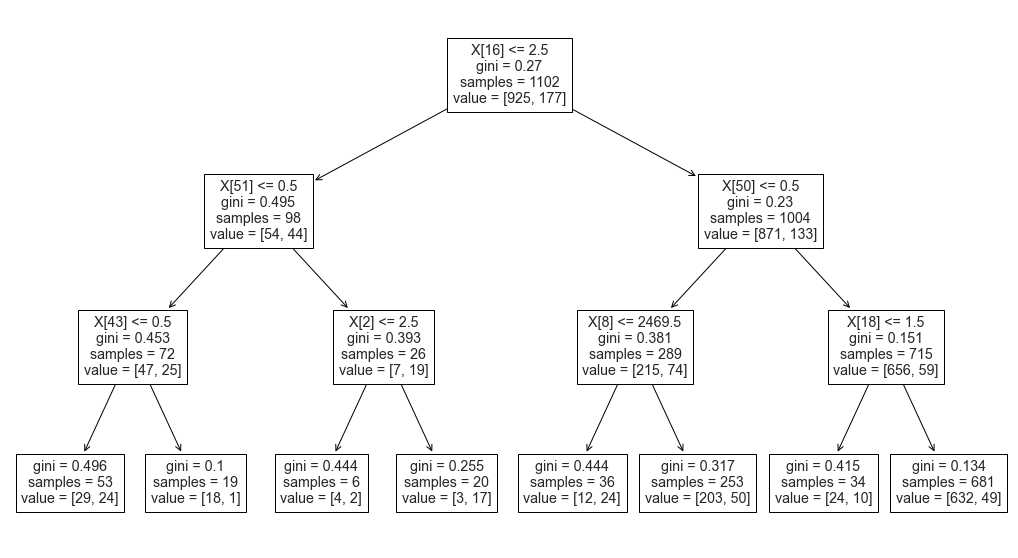

In [46]:
#Suurennetaan esitysaluetta oletuskoostaan suuremmaksi
plt.figure(figsize=(18, 10))

#Taustalle piiloon luotu päätöspuumalli esitetään plotaten graafisena visualisointina
tree.plot_tree(malli_tree_3)
#Kirjastosta saatavat puun erilaiset toiminnallisuudet saa IDEssä esiin kirjoittamalla 'tree.'
#ja naputtelemalla tabulaattoria (tai CTRL+SPACE)

### Ennakoivan analytiikan mallin sovitus datasettiin (4/4): Gaussian Naive Bayes
Koneoppimisessa kokeillaan erilaisia algoritmeja samaan historiadataan ja katsotaan mikä niistä arvaa parhaiten, kun ennustetta verrataan jo tiedossa oleviin toteumiin

#### 1. algoritmi kokeilu (ensimmäinen sovitusyritys: Miten malli sopii toteumaan) 
Kun kaikki muuttujat ovat mukana feature matrixissa ei tässä ole tulossa samalla koneoppimisen mallilla "<i>2. algoritmi kokeilu (toinen sovitusyritys: Miten malli sopii toteumaan)</i>"

In [47]:
#Ei asenneta Anacondassa vaan kerrotaan mistä "from foo.bar" tuodaan käytettäväksi "import lorem_ipsus"
##toiminnallisuus, joka perustuu Bayesin teoreemaan (Gaussian Naive Bayes -menetelmä)
from sklearn.naive_bayes import GaussianNB

#Luodaan malli-olio
malli_gaussian_nb = GaussianNB()

#Ennustemallille annetaan parametreina:
#feature matrix (muutosta selittävät muuttujat) ja
#target (ennustettava muuttuja, joka muuttuu feature matrixin muutosten vuoksi)
malli_gaussian_nb.fit(X_train, y_train)
###komennolla fit() sovitetaan malli dataan. Se on se komento, jolla konetta opetetaan

#Olion sisältämät toiminnallisuudet saa IDEssä esiin kirjoittamalla 'malli.'
#ja naputtelemalla tabulaattoria (tai CTRL+SPACE)
malli_gaussian_nb.get_params()


{'priors': None, 'var_smoothing': 1e-09}

In [48]:
#Malli-olion predict-toiminnolla voidaan laskea ennuste opetusdatalle
y_train_malli_gaussian_nb = malli_gaussian_nb.predict(X_train)
#Malli-olion predict-toiminnolla voidaan laskea ennuste testidatalle
y_test_malli_gaussian_nb = malli_gaussian_nb.predict(X_test)

In [49]:
#Opetusdatalle lasketun ennusteen vertaaminen tiedossa oleville
#todellisille arvoille (label) ennustuksen osumatarkkuus prosentteina
accuracy_score(y_train, y_train_malli_gaussian_nb)

0.7867513611615246

In [50]:
#Testidatalle lasketun ennusteen vertaaminen tiedossa oleville
#todellisille arvoille (label) ennustuksen osumatarkkuus prosentteina
accuracy_score(y_test, y_test_malli_gaussian_nb)
##Algoritmi ei ole nähnyt testidataa koulutusvaiheessa ja testidatalla
##varmistetaan ettei ole ylimallinnettu koulutusvaiheessa

0.7934782608695652

In [51]:
#Opetusdatan osalta väärin ennustettujen esiin nostaminen 
print(confusion_matrix(y_train, y_train_malli_gaussian_nb))

[[739 186]
 [ 49 128]]


In [52]:
#Testidatan osalta väärin ennustettujen esiin nostaminen 
print(confusion_matrix(y_test, y_test_malli_gaussian_nb))
##Algoritmi ei ole nähnyt testidataa koulutusvaiheessa ja testidatalla
##varmistetaan ettei ole ylimallinnettu koulutusvaiheessa

[[255  53]
 [ 23  37]]


In [53]:
from datetime import datetime
print(f'Lopeteltu {datetime.now()}')

Lopeteltu 2021-06-29 21:25:00.757043
